# 线性回归

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
data = pd.read_csv('AirData.csv')
data = data[['CO(GT)', 'PT08.S1(CO)','T','RH','AH']]
data = data[(True^data['CO(GT)'].isin([-200]))&(True^data['T'].isin([-200]))&(True^data['RH'].isin([-200]))&(True^data['AH'].isin([-200]))&(True^data['RH'].isin([-200]))]
#去除含缺失值的行
X = data[[ 'PT08.S1(CO)','T','RH','AH']]#选取CO传感器的值以及三个环境因素作为特征值
y = data[['CO(GT)']]#CO的真实值作为目标值
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#划分训练集和测试集
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
'''
#运行scikit-learn的线性模型
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()#得到模型
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [3]:
#该模型的正确率
linreg.score(X_test, y_test)

0.7723893123487855

In [4]:
#线性回归模型的系数结果
print(linreg.intercept_)
print(linreg.coef_)

[-3.63076037]
[[ 0.00589873 -0.0158209  -0.01203174  0.08064647]]


In [5]:
#用模型拟合测试集，得到均方差(Mean Squared Error,MSE)和均方根差(Root Mean Squared Error,RMSE)
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 0.48050541453830387
RMSE: 0.6931849785867433


In [6]:
#交叉验证
X = data[[ 'PT08.S1(CO)','T','RH','AH']]
y = data[['CO(GT)']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)

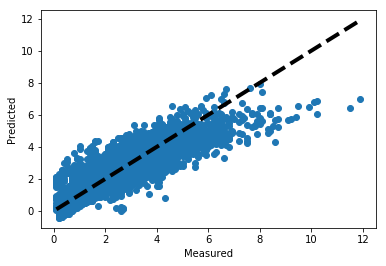

In [19]:
#可视化
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()